## Step 1: Import libraries

In [2]:
import matplotlib.pyplot as plt
import json

## Step 2: Plotting Electricity

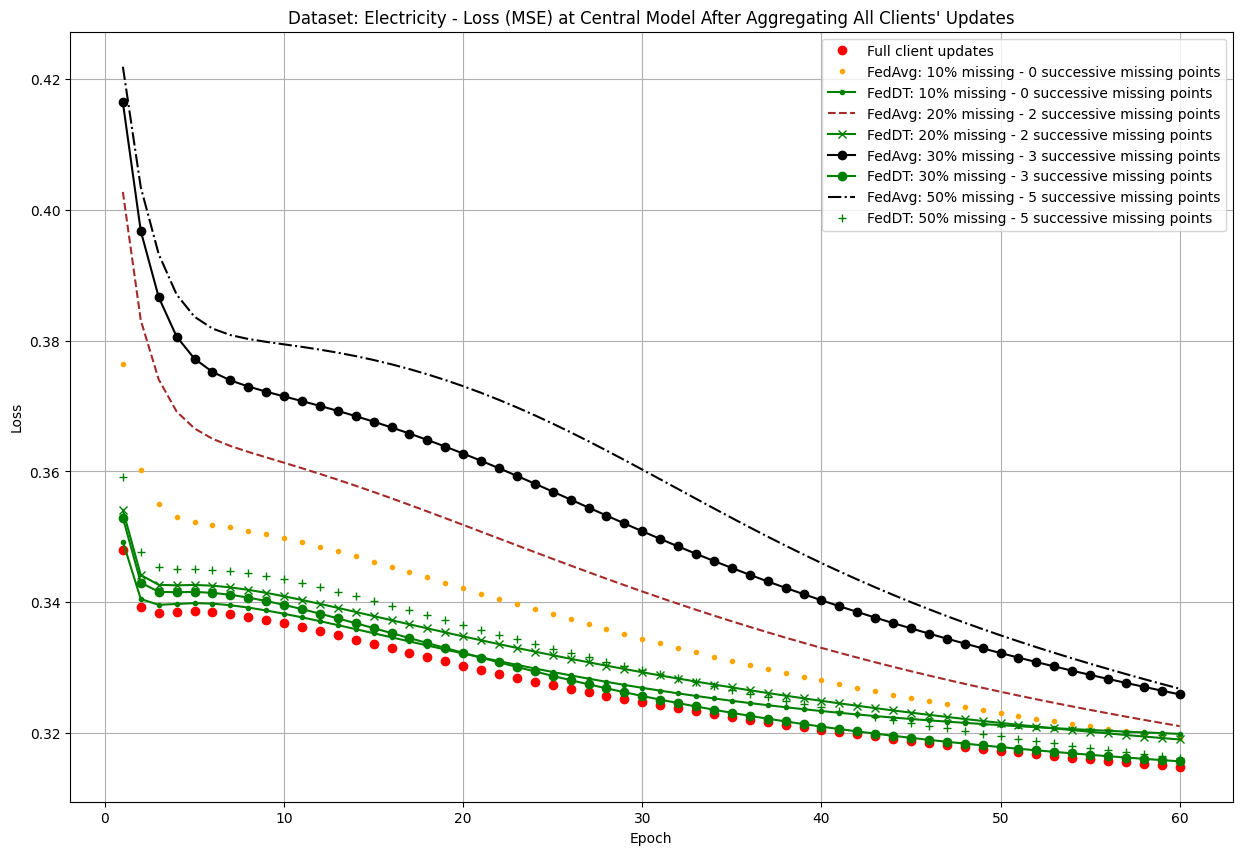

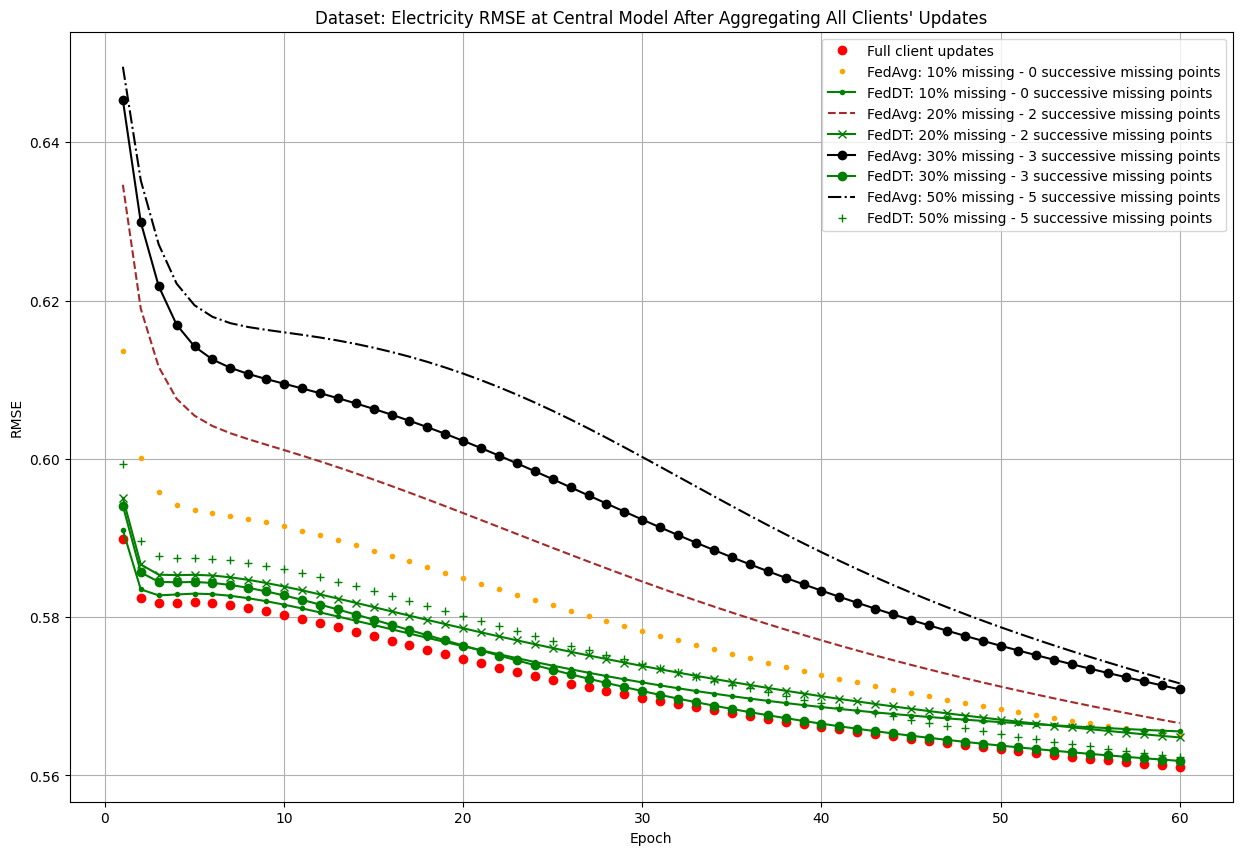

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "electricity"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "val_losses"
rmse_mode_display = "val_rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '.', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10[loss_mode_display], '.-', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], '--', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], '-x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '-o', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '-o', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '-.', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')

plt.title("Dataset: Electricity - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '.', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], '.-', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], '--', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], '-x', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], '-o', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '-o', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '-.', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')

plt.title("Dataset: Electricity RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()


## Step 3: Plotting Weather

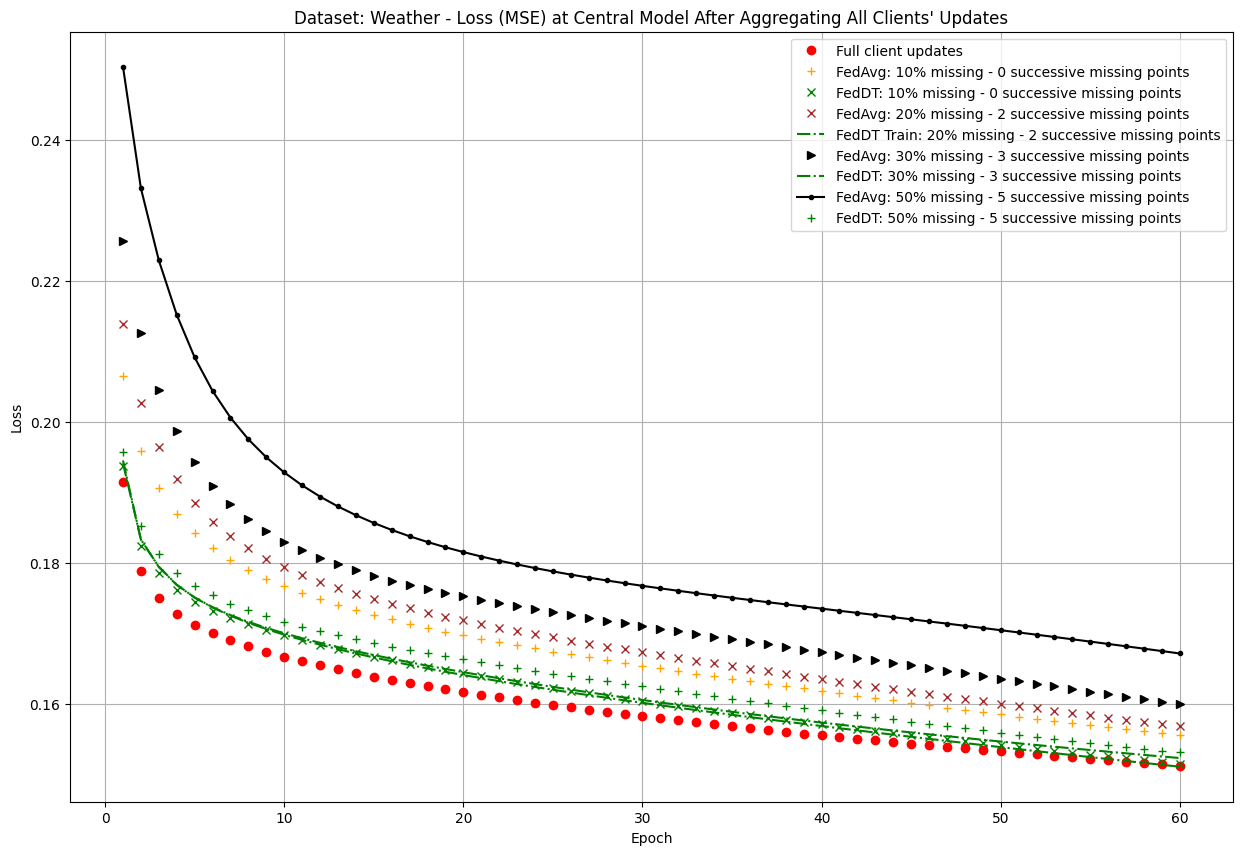

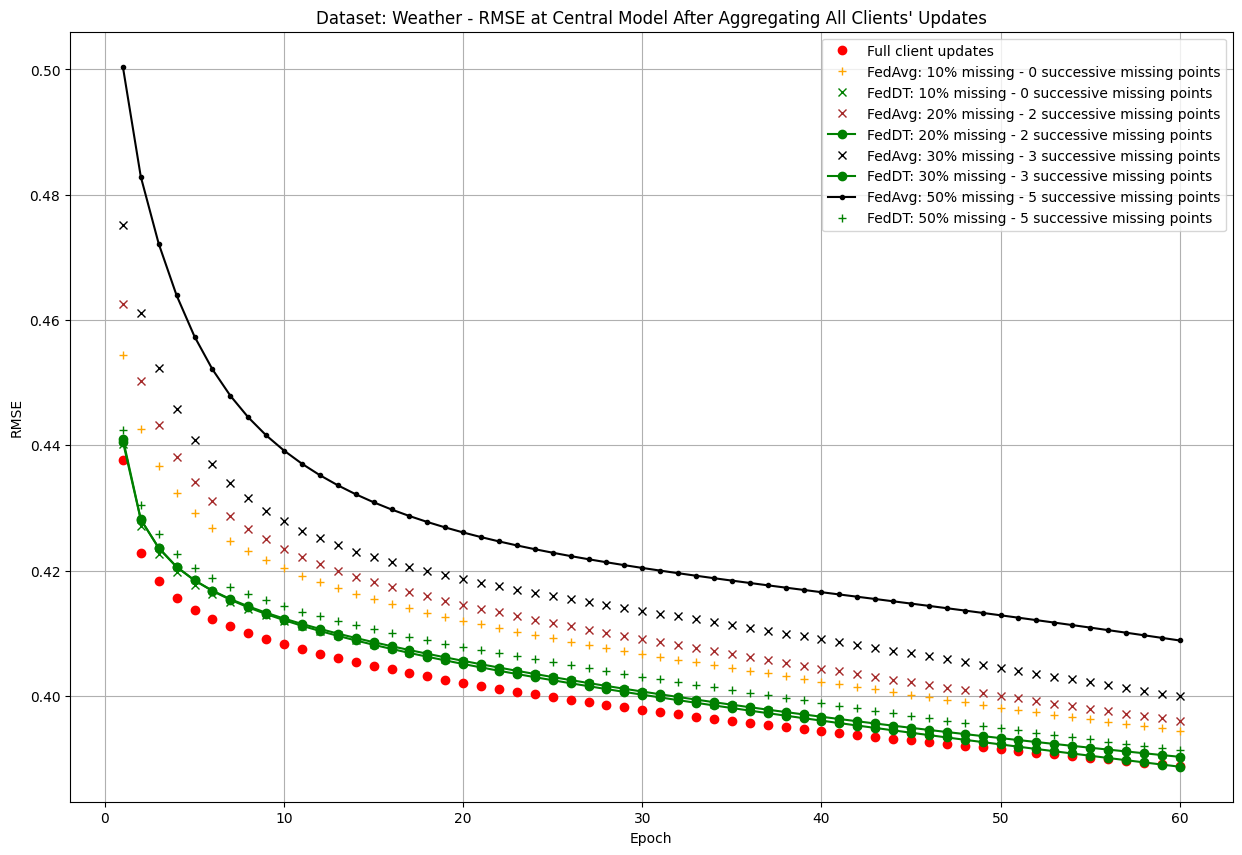

In [60]:
HISTORY_DIR = f'model_history'
DATASET = "weather"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], '-.', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '-.', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], '-o', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], 'x', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '-o', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Traffic dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "traffic"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], '-.', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '-.', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], '-o', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], 'x', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '-o', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 5: PSM dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "psm"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], '-.', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '-.', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], '-o', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], 'x', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '-o', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 6: Solar Power Dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "solarpower"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], '-.', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '-.', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], '-o', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], 'x', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '-o', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 7: M4 Quarterly Dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "m4"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], '-.', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '-.', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], '-o', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], 'x', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '-o', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Step 8: M4 Daily Dataset

In [ ]:
HISTORY_DIR = f'model_history'
DATASET = "train"
MATRIX_MISSING_LENGTH = "10x10"
LOCATION = "central"

loss_mode_display = "losses"
rmse_mode_display = "rmses"

normal_losses_rmses_dict = {}

avg_losses_rmses_dict_2 = {}
weigh_losses_rmses_dict_20 = {}

avg_losses_rmses_dict_30 = {}
weigh_losses_rmses_dict_30 = {}

avg_losses_rmses_dict_40 = {}
weigh_losses_rmses_dict_40 = {}

avg_losses_rmses_dict_50 = {}
weigh_losses_rmses_dict_50 = {}

with open(f"{HISTORY_DIR}/{DATASET}/normal/{LOCATION}/losses_rmses.json") as normal_file:
    normal_losses_rmses_dict = json.load(normal_file)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as avg_file_10:
    avg_losses_rmses_dict_10 = json.load(avg_file_10)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/01/noadjacency/losses_rmses.json") as weigh_file_10:
    weigh_losses_rmses_dict_10 = json.load(weigh_file_10)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as avg_file_20:
    avg_losses_rmses_dict_20 = json.load(avg_file_20)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/02/2adjacency/losses_rmses.json") as weigh_file_20:
    weigh_losses_rmses_dict_20 = json.load(weigh_file_20)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as avg_file_30:
    avg_losses_rmses_dict_30 = json.load(avg_file_30)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/03/3adjacency/losses_rmses.json") as weigh_file_30:
    weigh_losses_rmses_dict_30 = json.load(weigh_file_30)

with open(f"{HISTORY_DIR}/{DATASET}/avg/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as avg_file_50:
    avg_losses_rmses_dict_50 = json.load(avg_file_50)
with open(f"{HISTORY_DIR}/{DATASET}/weight/{LOCATION}/{MATRIX_MISSING_LENGTH}/05/5adjacency/losses_rmses.json") as weigh_file_50:
    weigh_losses_rmses_dict_50 = json.load(weigh_file_50)

plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[loss_mode_display]) + 1), normal_losses_rmses_dict[loss_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[loss_mode_display]) + 1), avg_losses_rmses_dict_10[loss_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[loss_mode_display]) + 1), weigh_losses_rmses_dict_10['losses'], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[loss_mode_display]) + 1), avg_losses_rmses_dict_20[loss_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[loss_mode_display]) + 1), weigh_losses_rmses_dict_20[loss_mode_display], '-.', color='green', label='FedDT Train: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[loss_mode_display]) + 1), avg_losses_rmses_dict_30[loss_mode_display], '>', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[loss_mode_display]) + 1), weigh_losses_rmses_dict_30[loss_mode_display], '-.', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[loss_mode_display]) + 1), avg_losses_rmses_dict_50[loss_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[loss_mode_display]) + 1), weigh_losses_rmses_dict_50[loss_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - Loss (MSE) at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 10))
plt.plot(range(1, len(normal_losses_rmses_dict[rmse_mode_display]) + 1), normal_losses_rmses_dict[rmse_mode_display], 'o', color='red', label='Full client updates')

plt.plot(range(1, len(avg_losses_rmses_dict_10[rmse_mode_display]) + 1), avg_losses_rmses_dict_10[rmse_mode_display], '+', color="orange", label='FedAvg: 10% missing - 0 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_10[rmse_mode_display]) + 1), weigh_losses_rmses_dict_10[rmse_mode_display], 'x', color='green', label='FedDT: 10% missing - 0 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_20[rmse_mode_display]) + 1), avg_losses_rmses_dict_20[rmse_mode_display], 'x', color='brown', label='FedAvg: 20% missing - 2 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_20[rmse_mode_display]) + 1), weigh_losses_rmses_dict_20[rmse_mode_display], '-o', color='green', label='FedDT: 20% missing - 2 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_30[rmse_mode_display]) + 1), avg_losses_rmses_dict_30[rmse_mode_display], 'x', color='black', label='FedAvg: 30% missing - 3 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_30[rmse_mode_display]) + 1), weigh_losses_rmses_dict_30[rmse_mode_display], '-o', color='green', label='FedDT: 30% missing - 3 successive missing points')

plt.plot(range(1, len(avg_losses_rmses_dict_50[rmse_mode_display]) + 1), avg_losses_rmses_dict_50[rmse_mode_display], '.-', color='black', label='FedAvg: 50% missing - 5 successive missing points')
plt.plot(range(1, len(weigh_losses_rmses_dict_50[rmse_mode_display]) + 1), weigh_losses_rmses_dict_50[rmse_mode_display], '+', color='green', label='FedDT: 50% missing - 5 successive missing points')


plt.title("Dataset: Weather - RMSE at Central Model After Aggregating All Clients' Updates")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()